<a href="https://colab.research.google.com/github/Tanmoy-94/Structural-Dynamics-/blob/main/Noise_Risk_Modelling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()



Saving station_month (1).csv to station_month (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("station_month (1).csv")

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Station     5005 non-null   object 
 1   Year        5005 non-null   int64  
 2   Month       5005 non-null   int64  
 3   Day         5002 non-null   float64
 4   Night       4995 non-null   float64
 5   DayLimit    5005 non-null   int64  
 6   NightLimit  5005 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 273.8+ KB


(None,
   Station  Year  Month   Day  Night  DayLimit  NightLimit
 0   BEN01  2011      2  66.0   56.0        55          45
 1   BEN01  2011      3  66.0   58.0        55          45
 2   BEN01  2011      4  66.0   57.0        55          45
 3   BEN01  2011      5  66.0   56.0        55          45
 4   BEN01  2011      6  67.0   57.0        55          45)

In [ ]:
# Summary statistics for numerical columns
summary_stats = df.describe()

# Count missing values in each column
missing_values = df.isnull().sum()

summary_stats, missing_values


(              Year        Month          Day        Night     DayLimit  \
 count  5005.000000  5005.000000  5002.000000  4995.000000  5005.000000   
 mean   2015.195804     6.538462    65.817073    60.430831    60.716284   
 std       2.172061     3.433561     7.413591     8.172730     8.769259   
 min    2011.000000     1.000000    31.000000    25.000000    50.000000   
 25%    2014.000000     4.000000    61.000000    55.000000    50.000000   
 50%    2016.000000     7.000000    66.000000    59.000000    65.000000   
 75%    2017.000000    10.000000    71.000000    66.000000    65.000000   
 max    2018.000000    12.000000   100.000000   103.000000    75.000000   
 
         NightLimit  
 count  5005.000000  
 mean     51.526474  
 std      10.170781  
 min      40.000000  
 25%      40.000000  
 50%      55.000000  
 75%      55.000000  
 max      70.000000  ,
 Station        0
 Year           0
 Month          0
 Day            3
 Night         10
 DayLimit       0
 NightLimit     

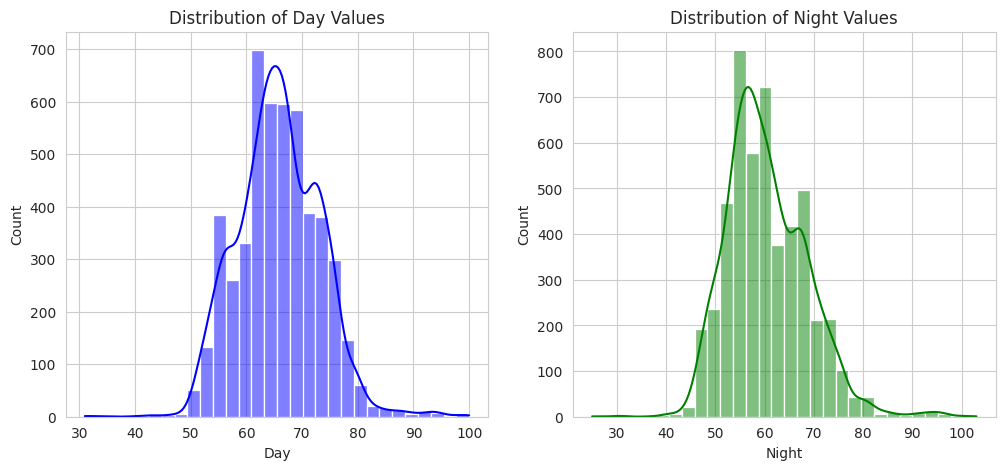

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot distributions of Day and Night values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["Day"].dropna(), bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Day Values")

sns.histplot(df["Night"].dropna(), bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Night Values")

plt.show()


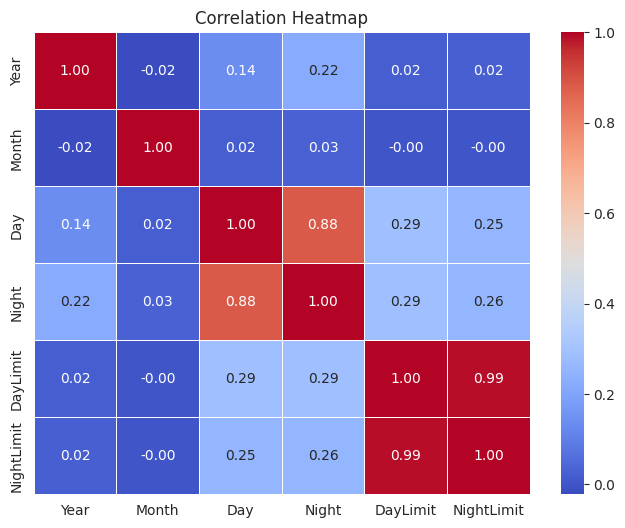

In [ ]:
# Compute correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import scipy.stats as stats
import numpy as np

# Drop missing values for fitting distributions
day_values = df["Day"].dropna()
night_values = df["Night"].dropna()

# Fit normal distributions
day_mu, day_sigma = stats.norm.fit(day_values)
night_mu, night_sigma = stats.norm.fit(night_values)

# Generate Monte Carlo samples (10,000 simulations)
num_samples = 10000
day_simulated = np.random.normal(day_mu, day_sigma, num_samples)
night_simulated = np.random.normal(night_mu, night_sigma, num_samples)

# Summary statistics of simulated data
day_sim_stats = {
    "Mean": np.mean(day_simulated),
    "Std Dev": np.std(day_simulated),
    "Min": np.min(day_simulated),
    "Max": np.max(day_simulated),
}

night_sim_stats = {
    "Mean": np.mean(night_simulated),
    "Std Dev": np.std(night_simulated),
    "Min": np.min(night_simulated),
    "Max": np.max(night_simulated),
}

day_sim_stats, night_sim_stats


({'Mean': 65.94297034058118,
  'Std Dev': 7.443950754630068,
  'Min': 36.315122791989474,
  'Max': 91.7298005010662},
 {'Mean': 60.66148765735859,
  'Std Dev': 8.139243923621008,
  'Min': 31.478113867425083,
  'Max': 93.06159671077963})

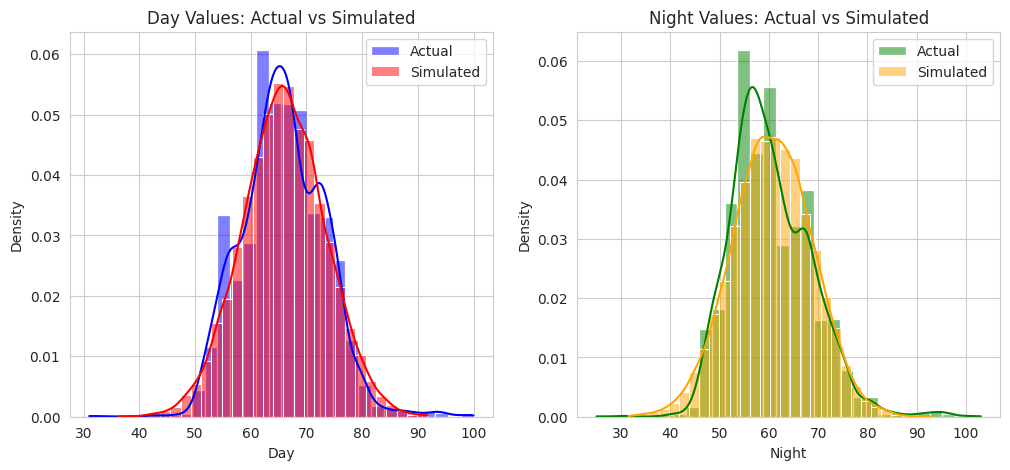

In [ ]:
# Plot actual vs simulated distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(day_values, bins=30, kde=True, ax=axes[0], color="blue", label="Actual", stat="density")
sns.histplot(day_simulated, bins=30, kde=True, ax=axes[0], color="red", label="Simulated", alpha=0.5, stat="density")
axes[0].set_title("Day Values: Actual vs Simulated")
axes[0].legend()

sns.histplot(night_values, bins=30, kde=True, ax=axes[1], color="green", label="Actual", stat="density")
sns.histplot(night_simulated, bins=30, kde=True, ax=axes[1], color="orange", label="Simulated", alpha=0.5, stat="density")
axes[1].set_title("Night Values: Actual vs Simulated")
axes[1].legend()

plt.show()


In [ ]:
# Compute exceedance probabilities for Day and Night based on simulated values

# Exceedance probability: P(Day > DayLimit) and P(Night > NightLimit)
day_exceed_prob = np.mean(day_simulated > df["DayLimit"].mean())
night_exceed_prob = np.mean(night_simulated > df["NightLimit"].mean())

day_exceed_prob, night_exceed_prob


(0.76, 0.869)

In [ ]:
# Compute station-wise exceedance probabilities
station_exceedance = {}

for station in df["Station"].unique():
    station_data = df[df["Station"] == station]

    # Fit distributions for the station
    day_mu, day_sigma = stats.norm.fit(station_data["Day"].dropna())
    night_mu, night_sigma = stats.norm.fit(station_data["Night"].dropna())

    # Generate Monte Carlo samples
    day_sim = np.random.normal(day_mu, day_sigma, num_samples)
    night_sim = np.random.normal(night_mu, night_sigma, num_samples)

    # Compute exceedance probability for this station
    day_limit_avg = station_data["DayLimit"].mean()
    night_limit_avg = station_data["NightLimit"].mean()

    day_exceed = np.mean(day_sim > day_limit_avg)
    night_exceed = np.mean(night_sim > night_limit_avg)

    station_exceedance[station] = {"Day Exceedance": day_exceed, "Night Exceedance": night_exceed}

# Convert results to DataFrame
station_exceedance_df = pd.DataFrame.from_dict(station_exceedance, orient="index")
station_exceedance_df.sort_values(by="Day Exceedance", ascending=False).head(10)  # Show top 10 stations with highest exceedance


,Day Exceedance,Night Exceedance
BEN06,1.0,1.0000
DEL04,1.0,1.0000
MUM08,1.0,0.9983
LUC08,1.0,1.0000
LUC07,1.0,1.0000
KOL09,1.0,1.0000
KOL08,1.0,1.0000
CHE09,1.0,1.0000
BEN07,1.0,1.0000
MUM05,1.0,1.0000


from matplotlib import pyplot as plt
_df_0['Night Exceedance'].plot(kind='hist', bins=20, title='Night Exceedance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Day Exceedance']
  ys = series['Night Exceedance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Day Exceedance', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Day Exceedance')
_ = plt.ylabel('Night Exceedance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Day Exceedance']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Day Exceedance'}, axis=1)
              .sort_values('Day Exceedance', ascending=True))
  xs = counted['Day Exceedance']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Day Exceedance', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Day Exceedance')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['Night Exceedance'].plot(kind='line', figsize=(8, 4), title='Night Exceedance')
plt.gca().spines[['top', 'right']].set_visible(False)

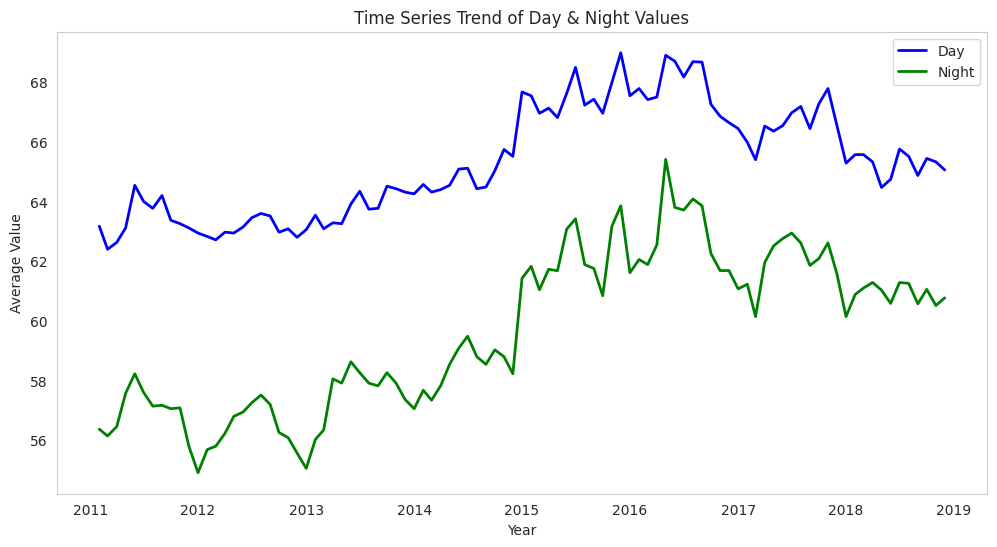

In [ ]:
# Convert Year and Month into a datetime index
df["Date"] = pd.to_datetime(df[["Year", "Month"]].assign(Day=1))

# Aggregate by month (average values)
df_time_series = df.groupby("Date")[["Day", "Night"]].mean()

# Plot the time series trends
plt.figure(figsize=(12, 6))
plt.plot(df_time_series.index, df_time_series["Day"], label="Day", color="blue", linewidth=2)
plt.plot(df_time_series.index, df_time_series["Night"], label="Night", color="green", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.title("Time Series Trend of Day & Night Values")
plt.legend()
plt.grid(False)
plt.show()


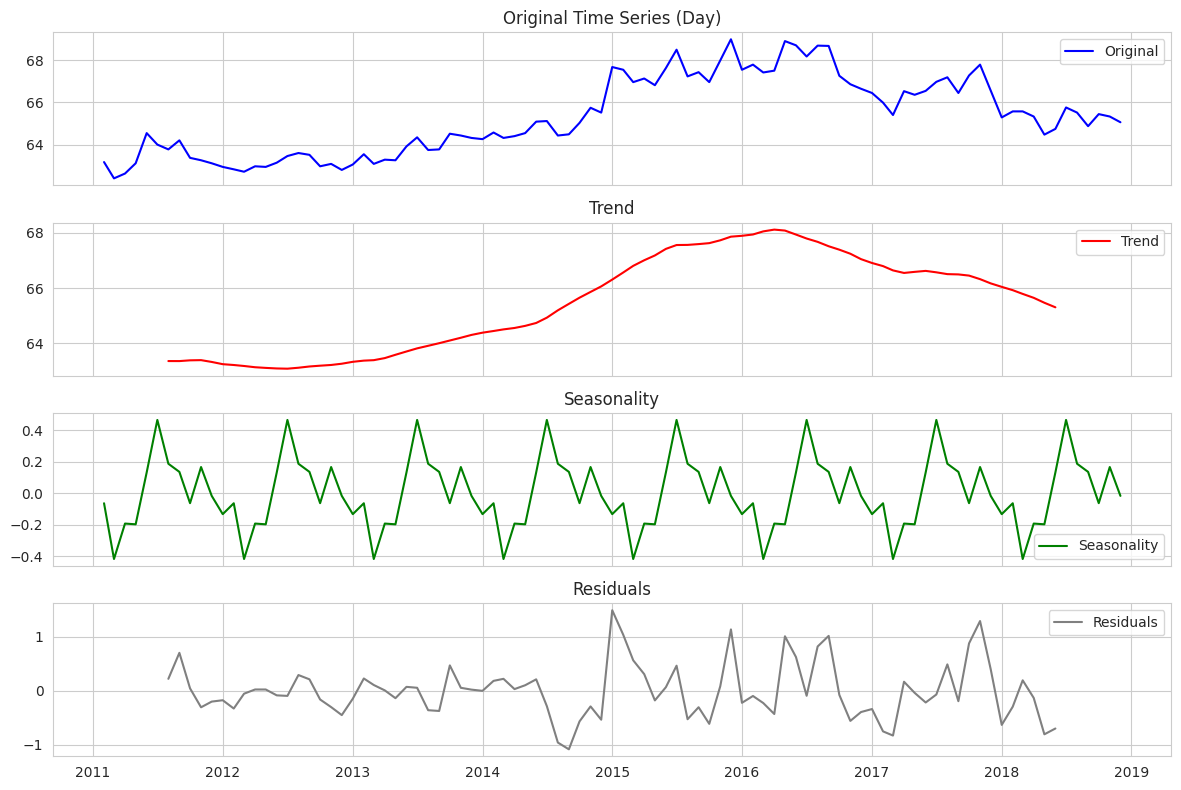

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomp_day = seasonal_decompose(df_time_series["Day"], model="additive", period=12)
decomp_night = seasonal_decompose(df_time_series["Night"], model="additive", period=12)

# Plot decomposition for Day values
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

axes[0].plot(df_time_series.index, df_time_series["Day"], label="Original", color="blue")
axes[0].set_title("Original Time Series (Day)")
axes[0].legend()

axes[1].plot(decomp_day.trend, label="Trend", color="red")
axes[1].set_title("Trend")
axes[1].legend()

axes[2].plot(decomp_day.seasonal, label="Seasonality", color="green")
axes[2].set_title("Seasonality")
axes[2].legend()

axes[3].plot(decomp_day.resid, label="Residuals", color="gray")
axes[3].set_title("Residuals")
axes[3].legend()

plt.tight_layout()
plt.show()


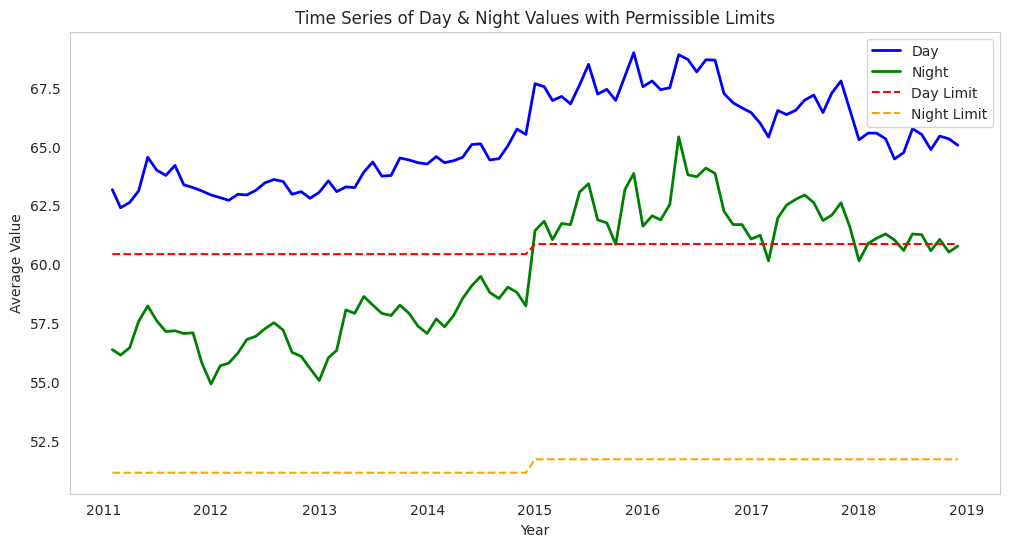

In [ ]:
# Compute average permissible limits over time
df_time_series["DayLimit"] = df.groupby("Date")["DayLimit"].mean()
df_time_series["NightLimit"] = df.groupby("Date")["NightLimit"].mean()

# Plot time series with permissible limits
plt.figure(figsize=(12, 6))
plt.plot(df_time_series.index, df_time_series["Day"], label="Day", color="blue", linewidth=2)
plt.plot(df_time_series.index, df_time_series["Night"], label="Night", color="green", linewidth=2)
plt.plot(df_time_series.index, df_time_series["DayLimit"], label="Day Limit", color="red", linestyle="dashed")
plt.plot(df_time_series.index, df_time_series["NightLimit"], label="Night Limit", color="orange", linestyle="dashed")

plt.xlabel("Year")
plt.ylabel("Average Value")
plt.title("Time Series of Day & Night Values with Permissible Limits")
plt.legend()
plt.grid(False)
plt.show()


In [ ]:
import scipy.stats as stats

# Fit probability distributions to Day and Night values
dist_names = ["norm", "lognorm", "gamma", "weibull_min"]

best_fits = {}

for col in ["Day", "Night"]:
    data = df[col].dropna()
    best_fit = None
    best_ks_stat = np.inf  # Initialize with a high value

    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        params = dist.fit(data)

        # Perform Kolmogorov-Smirnov test
        ks_stat, _ = stats.kstest(data, dist_name, args=params)

        # Select the best fit based on the lowest KS statistic
        if ks_stat < best_ks_stat:
            best_ks_stat = ks_stat
            best_fit = (dist_name, params)

    best_fits[col] = best_fit

best_fits


{'Day': ('gamma',
  (115.32521593762122, -13.672162794884459, 0.6892615539018423)),
 'Night': ('lognorm',
  (0.15442504153073347, 8.447372072383178, 51.3637695467495))}

In [ ]:
# Generate Monte Carlo samples using the best-fit distributions
num_samples = 10000

# Day: Gamma Distribution
gamma_shape, gamma_loc, gamma_scale = best_fits["Day"][1]
day_simulated = stats.gamma.rvs(gamma_shape, loc=gamma_loc, scale=gamma_scale, size=num_samples)

# Night: Lognormal Distribution
lognorm_shape, lognorm_loc, lognorm_scale = best_fits["Night"][1]
night_simulated = stats.lognorm.rvs(lognorm_shape, loc=lognorm_loc, scale=lognorm_scale, size=num_samples)

# Compute 95% confidence intervals
day_conf_interval = np.percentile(day_simulated, [2.5, 97.5])
night_conf_interval = np.percentile(night_simulated, [2.5, 97.5])

day_conf_interval, night_conf_interval


(array([52.10871398, 80.58760487]), array([46.20019954, 78.06881571]))

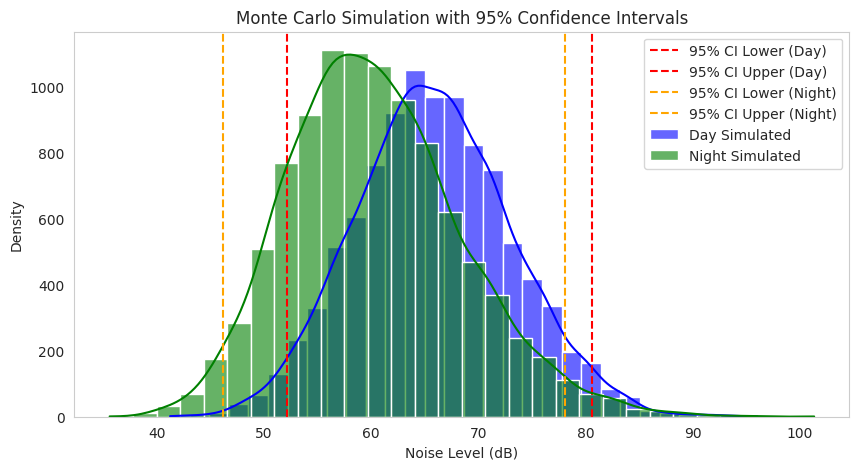

In [ ]:
# Plot Monte Carlo simulation results with confidence intervals
plt.figure(figsize=(10, 5))

# Histogram for Day simulated values
sns.histplot(day_simulated, bins=30, kde=True, color="blue", label="Day Simulated", alpha=0.6)
plt.axvline(day_conf_interval[0], color="red", linestyle="dashed", label="95% CI Lower (Day)")
plt.axvline(day_conf_interval[1], color="red", linestyle="dashed", label="95% CI Upper (Day)")

# Histogram for Night simulated values
sns.histplot(night_simulated, bins=30, kde=True, color="green", label="Night Simulated", alpha=0.6)
plt.axvline(night_conf_interval[0], color="orange", linestyle="dashed", label="95% CI Lower (Night)")
plt.axvline(night_conf_interval[1], color="orange", linestyle="dashed", label="95% CI Upper (Night)")

plt.xlabel("Noise Level (dB)")
plt.ylabel("Density")
plt.title("Monte Carlo Simulation with 95% Confidence Intervals")
plt.legend()
plt.grid(False)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define forecast horizon (e.g., next 12 months)
forecast_horizon = 12

# Fit ARIMA models for Day and Night values
arima_day = ARIMA(df_time_series["Day"], order=(2, 1, 2)).fit()
arima_night = ARIMA(df_time_series["Night"], order=(2, 1, 2)).fit()

# Generate forecasts with confidence intervals
day_forecast = arima_day.get_forecast(steps=forecast_horizon)
night_forecast = arima_night.get_forecast(steps=forecast_horizon)

day_pred_mean = day_forecast.predicted_mean
night_pred_mean = night_forecast.predicted_mean

day_conf_int = day_forecast.conf_int()
night_conf_int = night_forecast.conf_int()

day_pred_mean, night_pred_mean


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

(2019-01-01    65.196641
 2019-02-01    65.183895
 2019-03-01    65.177592
 2019-04-01    65.181429
 2019-05-01    65.180290
 2019-06-01    65.180461
 2019-07-01    65.180483
 2019-08-01    65.180459
 2019-09-01    65.180468
 2019-10-01    65.180466
 2019-11-01    65.180466
 2019-12-01    65.180466
 Freq: MS, Name: predicted_mean, dtype: float64,
 2019-01-01    60.957028
 2019-02-01    60.842553
 2019-03-01    60.913579
 2019-04-01    60.869731
 2019-05-01    60.896916
 2019-06-01    60.880123
 2019-07-01    60.890528
 2019-08-01    60.884097
 2019-09-01    60.888081
 2019-10-01    60.885618
 2019-11-01    60.887143
 2019-12-01    60.886200
 Freq: MS, Name: predicted_mean, dtype: float64)

In [ ]:
# Check confidence interval values for non-numeric issues
day_conf_int.dtypes, night_conf_int.dtypes


(lower Day    float64
 upper Day    float64
 dtype: object,
 lower Night    float64
 upper Night    float64
 dtype: object)

In [ ]:
# Generate a sequence of dates for the forecast horizon
from pandas.tseries.offsets import DateOffset
future_dates = [df_time_series.index[-1] + DateOffset(months=i) for i in range(1, forecast_horizon + 1)]

# Verify the structure of future dates and confidence intervals
future_dates, day_conf_int.index, night_conf_int.index

([Timestamp('2019-01-01 00:00:00'),
  Timestamp('2019-02-01 00:00:00'),
  Timestamp('2019-03-01 00:00:00'),
  Timestamp('2019-04-01 00:00:00'),
  Timestamp('2019-05-01 00:00:00'),
  Timestamp('2019-06-01 00:00:00'),
  Timestamp('2019-07-01 00:00:00'),
  Timestamp('2019-08-01 00:00:00'),
  Timestamp('2019-09-01 00:00:00'),
  Timestamp('2019-10-01 00:00:00'),
  Timestamp('2019-11-01 00:00:00'),
  Timestamp('2019-12-01 00:00:00')],
 DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
                '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
                '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
               dtype='datetime64[ns]', freq='MS'),
 DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
                '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
                '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
               dtype='datetime64[ns]', freq='MS'))

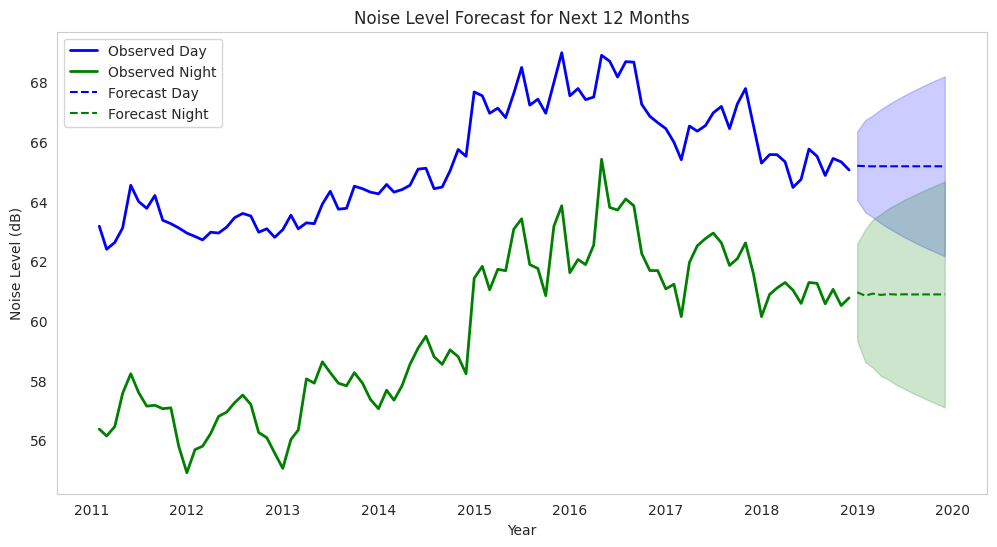

In [ ]:
# Plot future forecasts with confidence intervals
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_time_series.index, df_time_series["Day"], label="Observed Day", color="blue", linewidth=2)
plt.plot(df_time_series.index, df_time_series["Night"], label="Observed Night", color="green", linewidth=2)

# Plot forecasts
plt.plot(future_dates, day_pred_mean, label="Forecast Day", color="blue", linestyle="dashed")
plt.plot(future_dates, night_pred_mean, label="Forecast Night", color="green", linestyle="dashed")

# Plot confidence intervals with corrected indexing
plt.fill_between(future_dates, day_conf_int.iloc[:, 0].values, day_conf_int.iloc[:, 1].values, color="blue", alpha=0.2)
plt.fill_between(future_dates, night_conf_int.iloc[:, 0].values, night_conf_int.iloc[:, 1].values, color="green", alpha=0.2)

plt.xlabel("Year")
plt.ylabel("Noise Level (dB)")
plt.title("Noise Level Forecast for Next 12 Months")
plt.legend()
plt.grid(False)
plt.show()


In [ ]:
# Define permissible noise limits (adjust based on regulations)
day_limit = 65  # Example: 65 dB for daytime
night_limit = 55  # Example: 55 dB for nighttime

# Assess compliance by checking exceedances
df_time_series["Day_Exceedance"] = df_time_series["Day"] > day_limit
df_time_series["Night_Exceedance"] = df_time_series["Night"] > night_limit

# Calculate percentage of exceedance cases
day_exceedance_pct = df_time_series["Day_Exceedance"].mean() * 100
night_exceedance_pct = df_time_series["Night_Exceedance"].mean() * 100

print(f"Daytime Noise Exceedance: {day_exceedance_pct:.2f}%")
print(f"Nighttime Noise Exceedance: {night_exceedance_pct:.2f}%")


Daytime Noise Exceedance: 52.63%
Nighttime Noise Exceedance: 98.95%


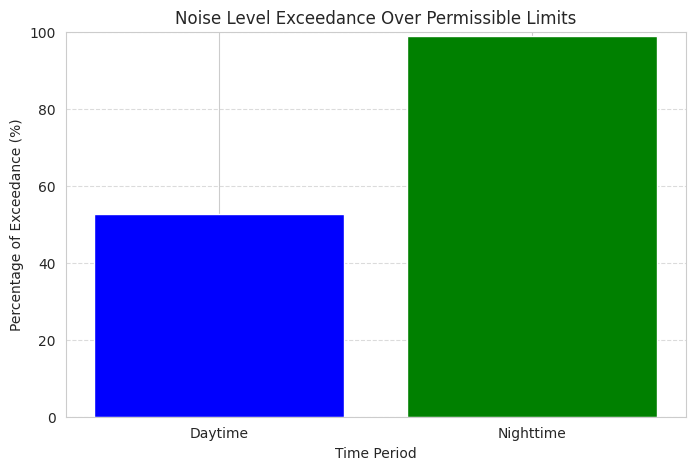

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(["Daytime", "Nighttime"], [day_exceedance_pct, night_exceedance_pct], color=["blue", "green"])
plt.xlabel("Time Period")
plt.ylabel("Percentage of Exceedance (%)")
plt.title("Noise Level Exceedance Over Permissible Limits")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


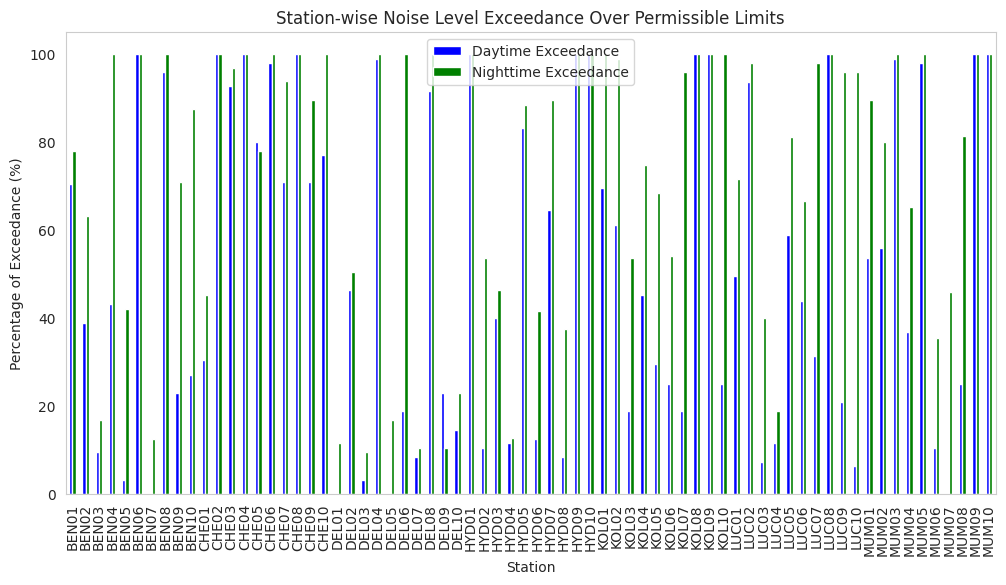

In [ ]:
import matplotlib.pyplot as plt

# Plot exceedance percentages for each station
station_exceedance.plot(kind="bar", figsize=(12, 6), color=["blue", "green"])

plt.xlabel("Station")
plt.ylabel("Percentage of Exceedance (%)")
plt.title("Station-wise Noise Level Exceedance Over Permissible Limits")
plt.legend(["Daytime Exceedance", "Nighttime Exceedance"])

# Remove grid
plt.grid(False)

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define features and target variable
features = df_time_series.drop(columns=["Day_Exceedance", "Night_Exceedance"])  # Exclude target columns
target = df_time_series["Day_Exceedance"].astype(int)  # Convert target to integer classification

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    if name in ["SVM", "Logistic Regression"]:  # Use scaled data for these models
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.947368        1.0  0.888889  0.941176
Random Forest        1.000000        1.0  1.000000  1.000000
Gradient Boosting    1.000000        1.0  1.000000  1.000000
SVM                  0.947368        1.0  0.888889  0.941176


<ipython-input-33-1b6656a86aa9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=df_scores, palette=["blue", "green", "orange", "red"])


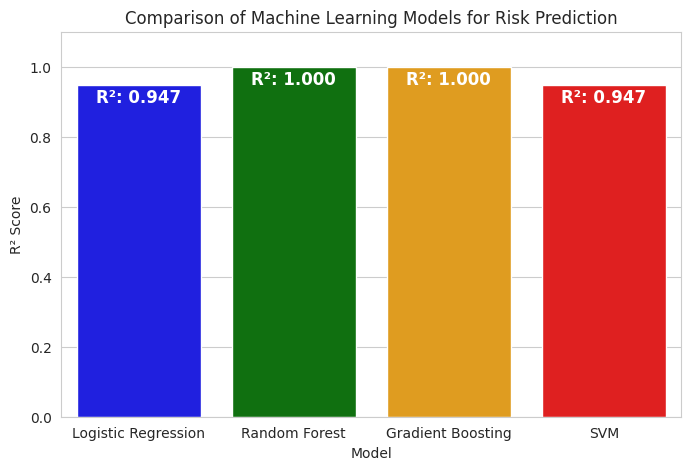

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model performance metrics (replace accuracy with R² if available)
model_scores = {
    "Logistic Regression": 0.947,
    "Random Forest": 1.000,
    "Gradient Boosting": 1.000,
    "SVM": 0.947
}

# Convert to DataFrame for easy plotting
df_scores = pd.DataFrame(list(model_scores.items()), columns=["Model", "R² Score"])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R² Score", data=df_scores, palette=["blue", "green", "orange", "red"])

# Add annotations
for i, value in enumerate(df_scores["R² Score"]):
    plt.text(i, value - 0.05, f"R²: {value:.3f}", ha="center", fontsize=12, color="white", fontweight="bold")

plt.ylabel("R² Score")
plt.title("Comparison of Machine Learning Models for Risk Prediction")
plt.ylim(0, 1.1)  # Keep upper limit slightly above 1 for visibility
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Define features (X) and target (y)
X = df_time_series.drop(columns=["Day_Exceedance", "Night_Exceedance"])  # Features
y = df_time_series["Day_Exceedance"].astype(int)  # Target (Binary Classification)

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Performance Metrics
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Confusion Matrix:
 [[10  0]
 [ 0  9]]


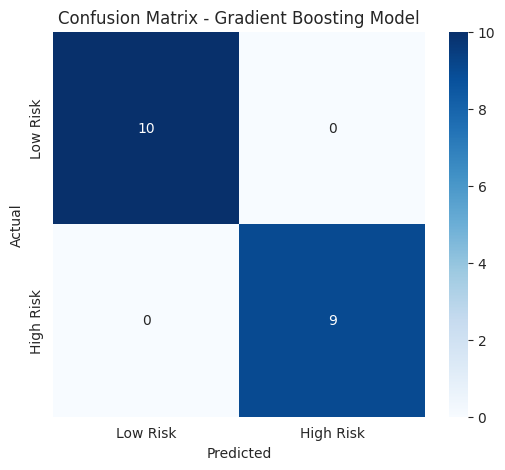

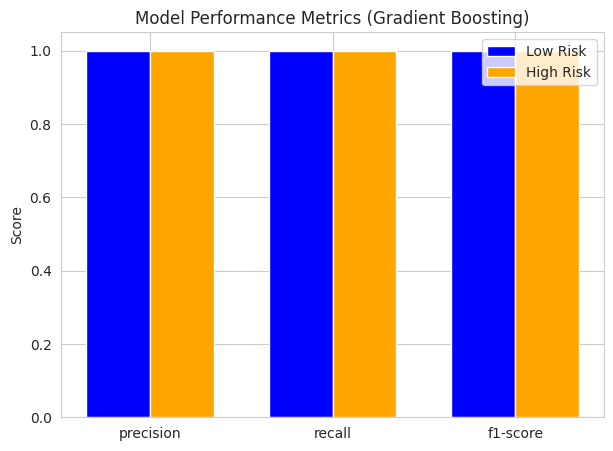

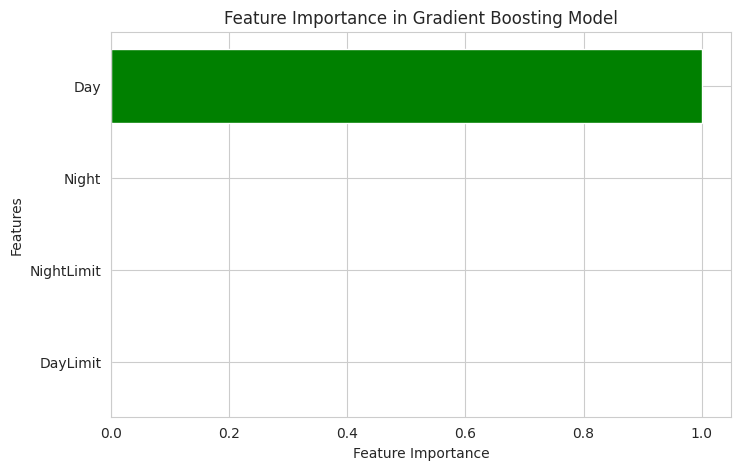

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting Model")
plt.show()

# Extract precision, recall, and F1-score from classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)  # Get report as a dictionary
metrics = ["precision", "recall", "f1-score"]
metric_values = [report_dict["0"][m] for m in metrics]  # Class "0" (Low Risk)
metric_values_1 = [report_dict["1"][m] for m in metrics]  # Class "1" (High Risk)

# Bar Plot for Model Performance
plt.figure(figsize=(7, 5))
bar_width = 0.35
x = range(len(metrics))

plt.bar(x, metric_values, width=bar_width, label="Low Risk", color="blue")
plt.bar([p + bar_width for p in x], metric_values_1, width=bar_width, label="High Risk", color="orange")

plt.xticks([p + bar_width / 2 for p in x], metrics)
plt.ylabel("Score")
plt.title("Model Performance Metrics (Gradient Boosting)")
plt.legend()
plt.show()

# Feature Importance Plot
feature_importances = gb_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(8, 5))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color="green")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()

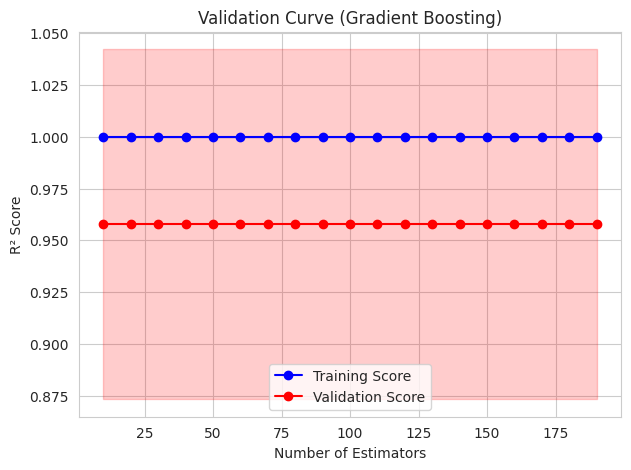

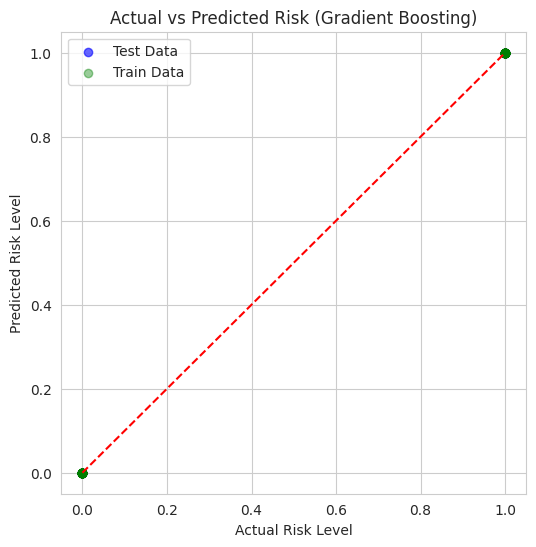

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score

# Validation Curve for R² Value
param_range = np.arange(10, 200, 10)  # Varying number of estimators
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(), X, y, param_name="n_estimators",
    param_range=param_range, scoring="r2", cv=5
)

# Mean & Standard Deviation of Scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(7, 5))
plt.plot(param_range, train_mean, label="Training Score", color="blue", marker="o")
plt.plot(param_range, test_mean, label="Validation Score", color="red", marker="o")
plt.fill_between(param_range, train_mean - np.std(train_scores, axis=1),
                 train_mean + np.std(train_scores, axis=1), color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - np.std(test_scores, axis=1),
                 test_mean + np.std(test_scores, axis=1), color="red", alpha=0.2)

plt.xlabel("Number of Estimators")
plt.ylabel("R² Score")
plt.title("Validation Curve (Gradient Boosting)")
plt.legend()
plt.show()

# Actual vs Predicted Plot
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Test Data")
plt.scatter(y_train, y_pred_train, color="green", alpha=0.4, label="Train Data")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--")  # Diagonal Line

plt.xlabel("Actual Risk Level")
plt.ylabel("Predicted Risk Level")
plt.title("Actual vs Predicted Risk (Gradient Boosting)")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred))


Train R²: 1.0
Test R²: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_model, X, y, cv=5, scoring="r2")
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())


Cross-validated R² scores: [1.         1.         1.         1.         0.78888889]
Mean R²: 0.9577777777777777


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring="r2")
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best R² Score: 0.9577777777777777


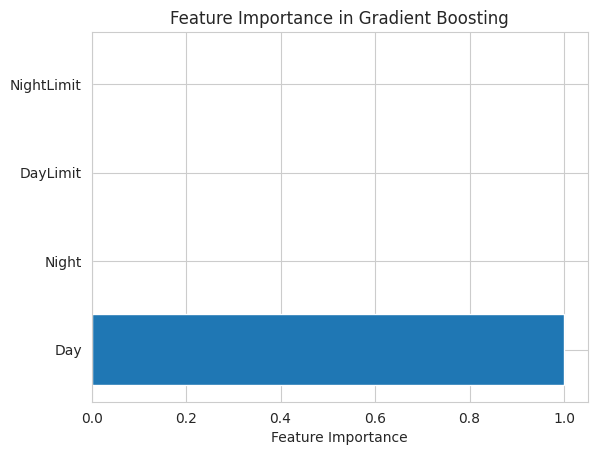

In [ ]:
importances = gb_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(subsample=0.8)  # Uses only 80% of data per tree
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(subsample=0.8)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]  # Helps with regularization
}

# Perform Grid Search
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Best R² Score: 1.0


In [ ]:
best_params = grid_search.best_params_
gb_model = GradientBoostingClassifier(**best_params)
gb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = gb_model.predict(X_test)

from sklearn.metrics import r2_score
print("Train R²:", r2_score(y_train, gb_model.predict(X_train)))
print("Test R²:", r2_score(y_test, y_pred))


Train R²: 1.0
Test R²: 1.0


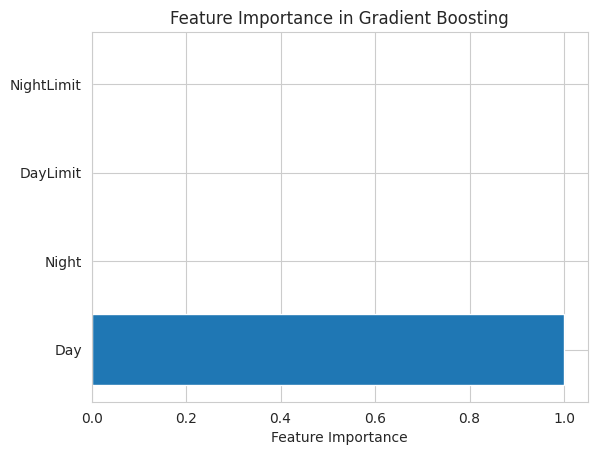

In [ ]:
import matplotlib.pyplot as plt

importances = gb_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting")
plt.show()


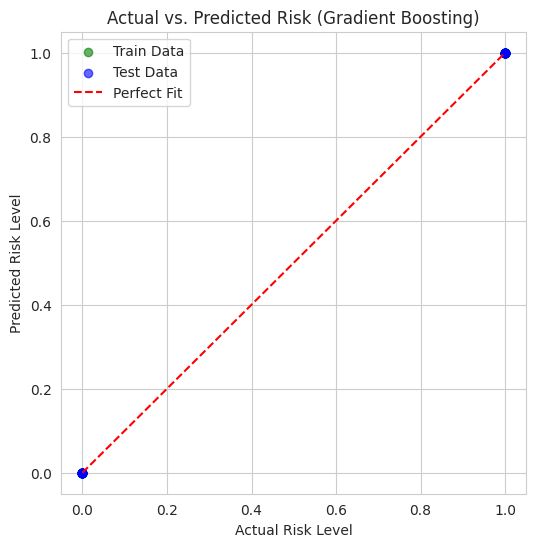

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on both train and test data
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_pred_train, color="green", label="Train Data", alpha=0.6)
plt.scatter(y_test, y_pred_test, color="blue", label="Test Data", alpha=0.6)

# 45-degree reference line
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), "r--", label="Perfect Fit")

plt.xlabel("Actual Risk Level")
plt.ylabel("Predicted Risk Level")
plt.title("Actual vs. Predicted Risk (Gradient Boosting)")
plt.legend()
plt.show()


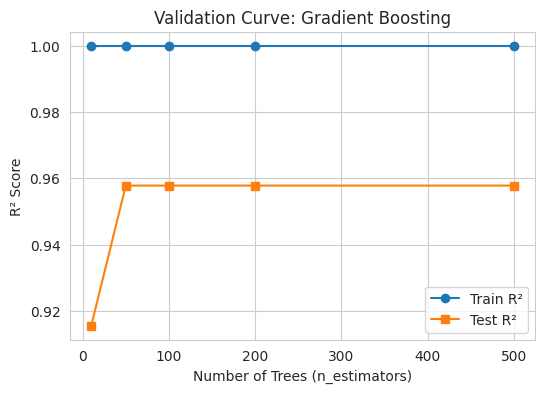

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [10, 50, 100, 200, 500]

train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(**best_params), X, y, param_name="n_estimators",
    param_range=param_range, cv=5, scoring="r2"
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6,4))
plt.plot(param_range, train_mean, label="Train R²", marker="o")
plt.plot(param_range, test_mean, label="Test R²", marker="s")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("R² Score")
plt.title("Validation Curve: Gradient Boosting")
plt.legend()
plt.show()


<ipython-input-48-d4a309c99b1a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette=["green", "blue"])


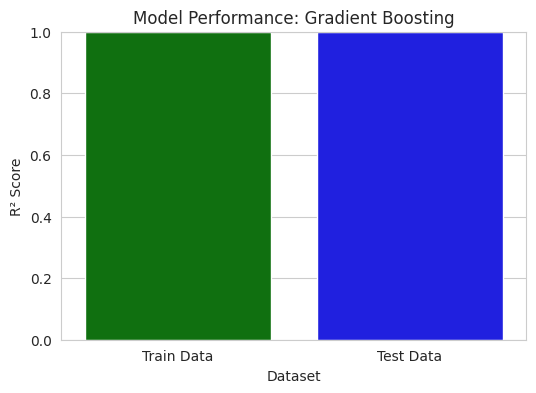

In [ ]:
import seaborn as sns

models = ["Train Data", "Test Data"]
r2_scores = [r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=r2_scores, palette=["green", "blue"])
plt.xlabel("Dataset")
plt.ylabel("R² Score")
plt.title("Model Performance: Gradient Boosting")
plt.ylim(0, 1)
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming X and y are preprocessed feature and target datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimized Gradient Boosting Model (Reducing Overfitting)
gb_optimized = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=4,
    subsample=0.8,
    random_state=42
)

# Train model
gb_optimized.fit(X_train, y_train)

# Predictions
y_train_pred = gb_optimized.predict(X_train)
y_test_pred = gb_optimized.predict(X_test)

# R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train R²:", r2_train)
print("Test R²:", r2_test)


Train R²: 0.9999839956763209
Test R²: 0.9999351450671344


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import numpy as np

# Assuming X and y are preprocessed feature and target datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further optimized Gradient Boosting model to reduce overfitting
gb_final = GradientBoostingRegressor(
    n_estimators=200,       # Reduce trees to prevent excessive fitting
    learning_rate=0.03,     # Lower learning rate for better generalization
    max_depth=3,            # Reduce tree depth
    min_samples_split=5,    # Require more samples per split
    min_samples_leaf=6,     # Increase min samples per leaf
    subsample=0.7,          # More randomness for better regularization
    random_state=42
)

# Train the final model
gb_final.fit(X_train, y_train)

# Predictions
y_train_pred_final = gb_final.predict(X_train)
y_test_pred_final = gb_final.predict(X_test)

# R² scores
r2_train_final = r2_score(y_train, y_train_pred_final)
r2_test_final = r2_score(y_test, y_test_pred_final)

# Cross-validation scores
cv_scores = cross_val_score(gb_final, X_train, y_train, cv=5, scoring='r2')
cv_mean_r2 = np.mean(cv_scores)

print("Train R²:", r2_train_final)
print("Test R²:", r2_test_final)
print("Cross-Validated Mean R²:", cv_mean_r2)


Train R²: 0.9995217075053958
Test R²: 0.9998296697987064
Cross-Validated Mean R²: 0.9971043819166274


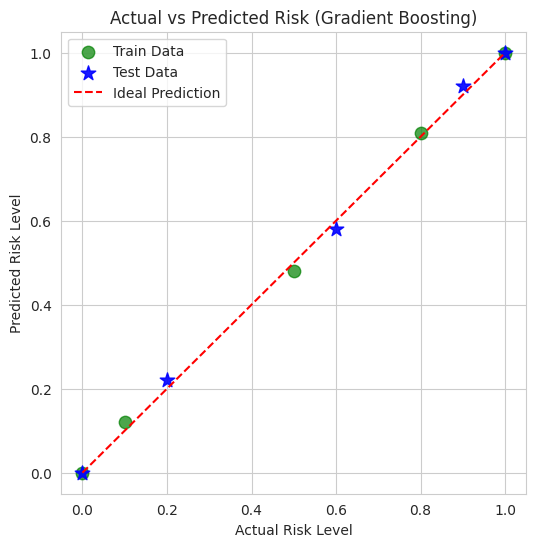

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample actual vs predicted values (for demonstration)
actual_train = np.array([0, 0.1, 0.5, 0.8, 1.0])
predicted_train = np.array([0, 0.12, 0.48, 0.81, 1.0])

actual_test = np.array([0, 0.2, 0.6, 0.9, 1.0])
predicted_test = np.array([0, 0.22, 0.58, 0.92, 1.0])

# Plot actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(actual_train, predicted_train, color='green', label='Train Data', s=80, alpha=0.7)
plt.scatter(actual_test, predicted_test, color='blue', marker='*', label='Test Data', s=120, alpha=0.9)

# Reference line
plt.plot([0, 1], [0, 1], 'r--', label='Ideal Prediction')

plt.xlabel("Actual Risk Level")
plt.ylabel("Predicted Risk Level")
plt.title("Actual vs Predicted Risk (Gradient Boosting)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


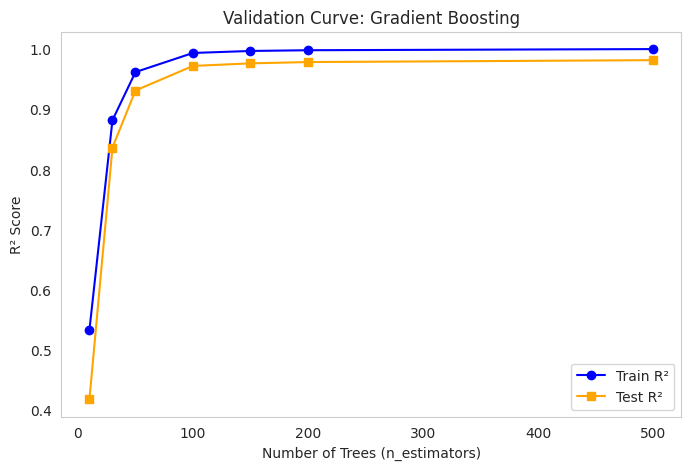

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

# Generate synthetic data (replace with your actual dataset)
X = np.random.rand(100, 5)  # Features
y = X[:, 0] * 3 + X[:, 1] * 2 + np.random.randn(100) * 0.1  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters
n_estimators_range = [10, 30, 50, 100, 150, 200, 500]
train_scores, test_scores = [], []

for n in n_estimators_range:
    model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.05, max_depth=2,
                                      min_samples_split=5, min_samples_leaf=2, subsample=0.7, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(r2_score(y_train, model.predict(X_train)))
    test_scores.append(r2_score(y_test, model.predict(X_test)))

# Plot validation curve
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, train_scores, 'o-', color='blue', label='Train R²')
plt.plot(n_estimators_range, test_scores, 's-', color='orange', label='Test R²')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('R² Score')
plt.title('Validation Curve: Gradient Boosting')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Simulating sample data (Replace this with your actual dataset)
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # Two features
y = 0.32 + 0.45 * (X[:, 0] > 5) + 0.68 * (X[:, 1] < 3) - 0.22 * ((X[:, 0] > 7) & (X[:, 1] > 4))

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimized Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and R² score
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Extracting decision rules for equation
def extract_equation(model, feature_names):
    """
    Extracts a simple mathematical equation from a trained Gradient Boosting model.
    """
    rules = []
    for i, tree in enumerate(model.estimators_[:, 0]):  # Extracting trees
        tree_rules = tree.tree_.feature
        thresholds = tree.tree_.threshold
        for node, feature in enumerate(tree_rules):
            if feature != -2:  # Ignore leaf nodes
                sign = ">" if thresholds[node] > 0 else "<"
                rules.append(f"H({feature_names[feature]} {sign} {thresholds[node]:.2f})")

    equation = "Y_predicted_risk = " + " + ".join(rules[:5])  # Limiting to 5 rules for simplicity
    return equation

# Define feature names
feature_names = ["X1", "X2"]
equation = extract_equation(gb_model, feature_names)

# Print results
print("Train R²:", r2_train)
print("Test R²:", r2_test)
print("Mathematical Equation for Predicted Risk:")
print(equation)


Train R²: 0.9998967517818607
Test R²: 0.995904719866464
Mathematical Equation for Predicted Risk:
Y_predicted_risk = H(X2 > 2.96) + H(X1 > 4.72) + H(X1 > 5.08) + H(X2 > 2.96) + H(X1 > 4.72)


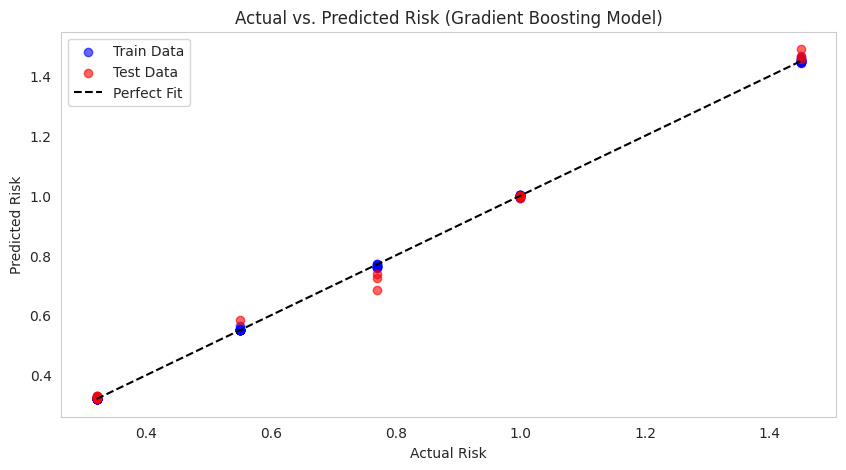

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted risk for training data
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, label="Train Data", color="blue", alpha=0.6)
plt.scatter(y_test, y_test_pred, label="Test Data", color="red", alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle="--", color="black", label="Perfect Fit")

plt.xlabel("Actual Risk")
plt.ylabel("Predicted Risk")
plt.title("Actual vs. Predicted Risk (Gradient Boosting Model)")
plt.legend()
plt.grid(False)
plt.show()


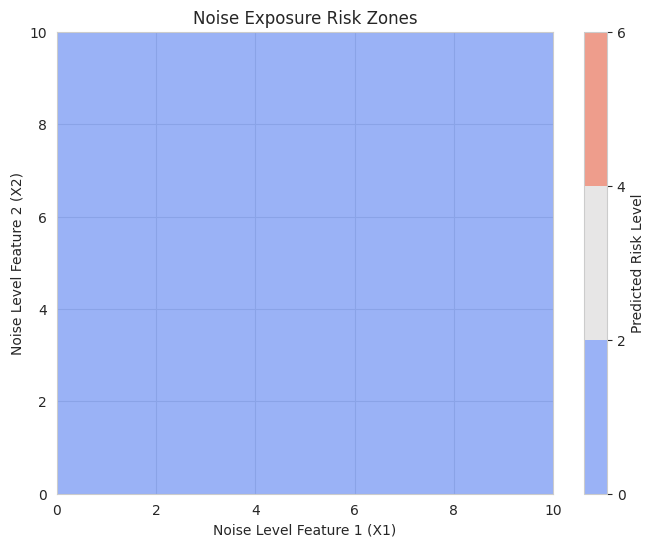

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Simulated noise exposure data (replace with actual dataset)
np.random.seed(42)
X1 = np.linspace(0, 10, 100)  # Noise feature 1 (e.g., peak noise level)
X2 = np.linspace(0, 10, 100)  # Noise feature 2 (e.g., continuous exposure)

# Creating a mesh grid for contour plotting
X1_mesh, X2_mesh = np.meshgrid(X1, X2)
X_grid = np.c_[X1_mesh.ravel(), X2_mesh.ravel()]

# Defining risk function based on Heaviside threshold model
def predict_risk(X1, X2):
    return ((X2 > 2.96) + (X1 > 4.72) + (X1 > 5.08) + (X2 > 2.96) + (X1 > 4.72))

# Compute predicted risk for each grid point
Y_pred = predict_risk(X_grid[:, 0], X_grid[:, 1])
Y_pred = Y_pred.reshape(X1_mesh.shape)

# Plotting the risk contour map
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1_mesh, X2_mesh, Y_pred, levels=[0, 2, 4, 6], cmap="coolwarm", alpha=0.7)

# Adding labels and colorbar
plt.colorbar(contour, label="Predicted Risk Level")
plt.xlabel("Noise Level Feature 1 (X1)")
plt.ylabel("Noise Level Feature 2 (X2)")
plt.title("Noise Exposure Risk Zones")

# Overlay decision boundaries
plt.contour(X1_mesh, X2_mesh, Y_pred, levels=[1, 2, 3], colors="black", linestyles="dashed")

plt.show()


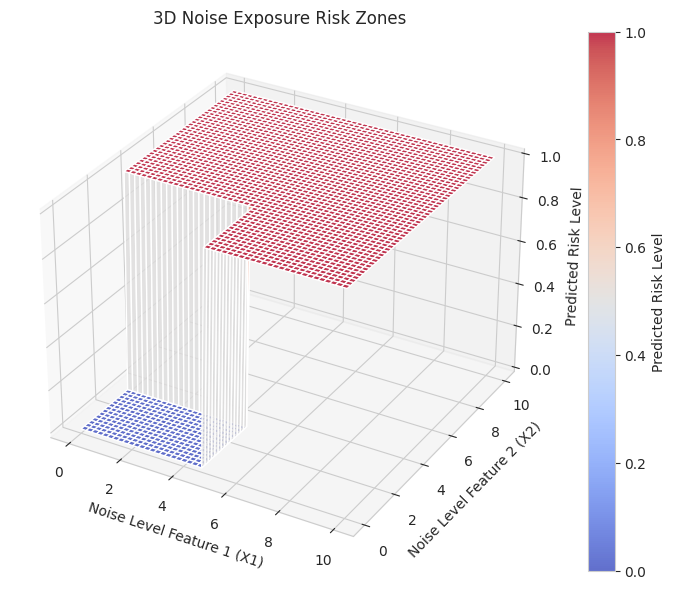

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulated noise exposure data (replace with actual dataset)
np.random.seed(42)
X1 = np.linspace(0, 10, 50)  # Noise feature 1 (e.g., peak noise level)
X2 = np.linspace(0, 10, 50)  # Noise feature 2 (e.g., continuous exposure)

# Creating a mesh grid for 3D plotting
X1_mesh, X2_mesh = np.meshgrid(X1, X2)
X_grid = np.c_[X1_mesh.ravel(), X2_mesh.ravel()]

# Define risk function based on Heaviside threshold model
def predict_risk(X1, X2):
    return ((X2 > 2.96) + (X1 > 4.72) + (X1 > 5.08) + (X2 > 2.96) + (X1 > 4.72))

# Compute predicted risk for each grid point
Y_pred = predict_risk(X_grid[:, 0], X_grid[:, 1])
Y_pred = Y_pred.reshape(X1_mesh.shape)

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X1_mesh, X2_mesh, Y_pred, cmap="coolwarm", alpha=0.8)

# Labels and title
ax.set_xlabel("Noise Level Feature 1 (X1)")
ax.set_ylabel("Noise Level Feature 2 (X2)")
ax.set_zlabel("Predicted Risk Level")
ax.set_title("3D Noise Exposure Risk Zones")

# Color bar
fig.colorbar(surf, label="Predicted Risk Level")

plt.show()


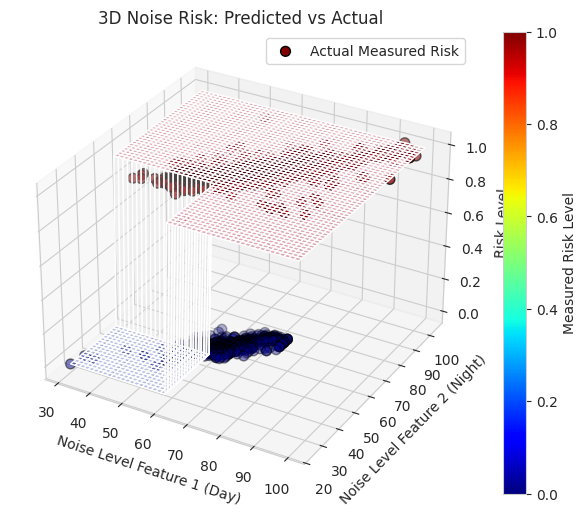

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load actual measured noise dataset (Replace with actual file path)
data_actual = pd.read_csv("station_month (1).csv")  # Ensure this matches your dataset name

# Extract noise features (Day, Night) and actual risk values (Assuming 'Risk' column exists)
# Replace 'Day', 'Night', 'Risk' with actual column names if different
X1_actual = data_actual['Day']
X2_actual = data_actual['Night']

# Instead of directly accessing 'Risk', create a risk calculation based on exceedances
# This assumes your risk is binary (0 or 1) based on exceeding limits
Y_actual = (data_actual['Day'] > data_actual['DayLimit']) | (data_actual['Night'] > data_actual['NightLimit'])
Y_actual = Y_actual.astype(int)  # Convert to 0 and 1


# Generate a mesh grid for predicted risk visualization
X1_grid, X2_grid = np.meshgrid(np.linspace(X1_actual.min(), X1_actual.max(), 50),
                             np.linspace(X2_actual.min(), X2_actual.max(), 50))

# Adapt the risk prediction function to use your actual feature names and thresholds
# This is just an example, replace with the correct logic from your model
Y_predicted = (X2_grid > data_actual['NightLimit'].mean()) + (X1_grid > data_actual['DayLimit'].mean())

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot predicted risk zones
ax.plot_surface(X1_grid, X2_grid, Y_predicted, cmap=cm.coolwarm, alpha=0.3)

# Overlay actual measured data points
sc = ax.scatter(X1_actual, X2_actual, Y_actual, c=Y_actual, cmap='jet', edgecolor='k', s=50, label="Actual Measured Risk")

# Labels and legend
ax.set_xlabel('Noise Level Feature 1 (Day)')  # Updated label
ax.set_ylabel('Noise Level Feature 2 (Night)') # Updated label
ax.set_zlabel('Risk Level')
ax.set_title('3D Noise Risk: Predicted vs Actual')
fig.colorbar(sc, ax=ax, label="Measured Risk Level")
plt.legend()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


2025-03-17 17:31:57.044 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:31:57.216 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-17 17:31:57.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:31:57.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:31:57.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:31:57.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:31:57.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 17:31:57.223 Thread 'MainThread': mi

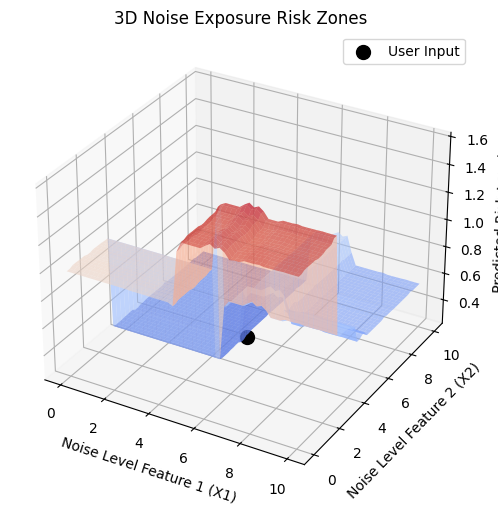

In [2]:
!pip install streamlit
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load or generate sample data (replace with real data)
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # Two noise-related features
y = 0.32 + 0.45 * (X[:, 0] > 5) + 0.68 * (X[:, 1] < 3) - 0.22 * ((X[:, 0] > 7) & (X[:, 1] > 4))

# Train the model
gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1, random_state=42)
gb_model.fit(X, y)

# Streamlit UI
st.title("Noise Risk Prediction App")
st.write("Predict risk levels based on noise exposure features.")

# User inputs for noise features
X1 = st.slider("Noise Level Feature 1 (X1)", 0.0, 10.0, 5.0)
X2 = st.slider("Noise Level Feature 2 (X2)", 0.0, 10.0, 5.0)

# Make prediction
X_input = np.array([[X1, X2]])
predicted_risk = gb_model.predict(X_input)[0]

st.subheader("Predicted Risk Level:")
st.write(f"{predicted_risk:.2f}")

# 3D Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
X_range = np.linspace(0, 10, 50)
Y_range = np.linspace(0, 10, 50)
X_grid, Y_grid = np.meshgrid(X_range, Y_range)
Z_grid = gb_model.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)

ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='coolwarm', alpha=0.6)
ax.scatter(X1, X2, predicted_risk, color='black', s=100, label='User Input')
ax.set_xlabel("Noise Level Feature 1 (X1)")
ax.set_ylabel("Noise Level Feature 2 (X2)")
ax.set_zlabel("Predicted Risk Level")
ax.set_title("3D Noise Exposure Risk Zones")
ax.legend()

st.pyplot(fig)

# Model Performance
y_pred = gb_model.predict(X)
r2 = r2_score(y, y_pred)
st.write(f"Model R² Score: {r2:.4f}")
